<a href="https://colab.research.google.com/github/abbyburkett/RealEstate-Prices/blob/main/Project_Analyzing_Real_Estate_Data_and_Predicting_the_House_Price_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 2: Analyzing Real Estate Data and Predicting the House Price using Machine Learning


**Name:** Abby Burkett

##Import all required libraries

In [ ]:
#import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

##Introduction of the data set and data variables##
Write the background of the data set ( where was the data collected, how they collected the data, citation of the source ). Explain the shape, number of variables, and display the data type of variables.

#Dataset: Real Estate Property Transactions Dataset

**Background:** This dataset contains information about real estate property transactions in the towns of the state of Conneticut. Each row represents a single property transaction.
The dataset includes various attributes such as transaction dates, property locations, estimated and sale prices, property characteristics (e.g., type, residential status, number of rooms and bathrooms, carpet area), and property tax rates.

**Source:** Kaggle

**Citation of Source:** https://www.kaggle.com/datasets/subhiarjaria09/real-estate-property-transactions-dataset/data

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read and display dataset
data_path = "/content/drive/MyDrive/DSC101/Data/"
real_estate = pd.read_csv(data_path + 'V3.csv')
real_estate.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2009-01-02,2009,NaN,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,NaN,1.025953,South
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East


In [ ]:
#display the shape of the data frame
real_estate.shape

(10000, 12)

In [ ]:
#display the info of the data frame
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8745 non-null   object 
 3   Estimated Value    8771 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [ ]:
#display all the columns of the data frame
real_estate.columns

Index(['Date', 'Year', 'Locality', 'Estimated Value', 'Sale Price', 'Property',
       'Residential', 'num_rooms', 'num_bathrooms', 'carpet_area',
       'property_tax_rate', 'Face'],
      dtype='object')

**Features:**

**Date:** The date when the property transaction occurred.

**Year:** The year of the property transaction.

**Locality:** The locality or area where the property is located.

**Estimated Value:** The estimated value of the property.

**Sale Price:** The actual sale price of the property.

**Property:** The type of property (e.g., Single Family).

**Residential:** Indicates whether the property is residential or not.

**Num_rooms:** The number of rooms in the property.

**Num_bathrooms:** The number of bathrooms in the property.

**Carpet Area:** The carpet area of the property.

**Property Tax Rate:** The property tax rate applicable to the property.

**Face:** The facing direction of the property (e.g., North, South, East).

**There are 12 columns in this data set**

##State Your Project Goal

The goal of this project is to create a linear regression model to accurately predict real estate property prices based on various input features. Also, we are trying to identify the best set of input features that minimize prediction error (RMSE and MAPE) while maximizing the coefficient of determination (R²).

##Data Cleaning and Preprocessing##
Check whether there are missing values. If you have missing values, use appropriate methods to handle such missing values. Convert the categorical variables into numerical categorical values. Check outliers through visualization and handle the outliers with appropriate methods.

In [ ]:
#check missing values
real_estate.isnull().sum()

Date                    0
Year                    0
Locality             1255
Estimated Value      1229
Sale Price              0
Property                0
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area          1282
property_tax_rate       0
Face                    0
dtype: int64

In [ ]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8745 non-null   object 
 3   Estimated Value    8771 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [ ]:
#drop missing values
#real_estate.dropna(inplace=True)
#drop 'Date' column because its unnecessary
real_estate.drop(['Date'], axis=1, inplace=True)

In [ ]:
#replace '?' in the data frame with NaN
real_estate.replace('?', np.nan, inplace=True)

In [ ]:
#drop missing values for object type
real_estate.dropna(subset=real_estate.select_dtypes(include='object').columns, inplace=True)

In [ ]:
#fill missing values from numerical columns
numeric_columns = real_estate.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    if real_estate[column].isnull().sum() > 0:
        # Fill missing values with mean
        real_estate[column].fillna(real_estate[column].mean(), inplace=True)

In [ ]:
#check if there are missing values after cleaning
real_estate.isnull().sum()

Year                 0
Locality             0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
num_bathrooms        0
carpet_area          0
property_tax_rate    0
Face                 0
dtype: int64

In [ ]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7169 entries, 0 to 9997
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7169 non-null   int64  
 1   Locality           7169 non-null   object 
 2   Estimated Value    7169 non-null   float64
 3   Sale Price         7169 non-null   float64
 4   Property           7169 non-null   object 
 5   Residential        7169 non-null   object 
 6   num_rooms          7169 non-null   int64  
 7   num_bathrooms      7169 non-null   int64  
 8   carpet_area        7169 non-null   float64
 9   property_tax_rate  7169 non-null   float64
 10  Face               7169 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 672.1+ KB


In [ ]:
real_estate.head()

,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009,Waterbury,1.114400e+05,185000.0,Single Family,Detached House,3,3,996.000000,1.025953,South
2,2009,Waterbury,5.054000e+04,105000.0,Single Family,Detached House,3,1,951.000000,1.025953,East
3,2009,Norwalk,5.710600e+05,1000000.0,Single Family,Detached House,3,2,1109.799425,1.025953,South
4,2009,Bridgeport,4.775276e+06,272900.0,Single Family,Detached House,3,1,971.000000,1.025953,East
6,2009,Norwalk,4.430183e+05,1340000.0,Single Family,Detached House,3,1,936.000000,1.025953,North


##Did the visualization before converting objects into numerical so it's easier to interpret.

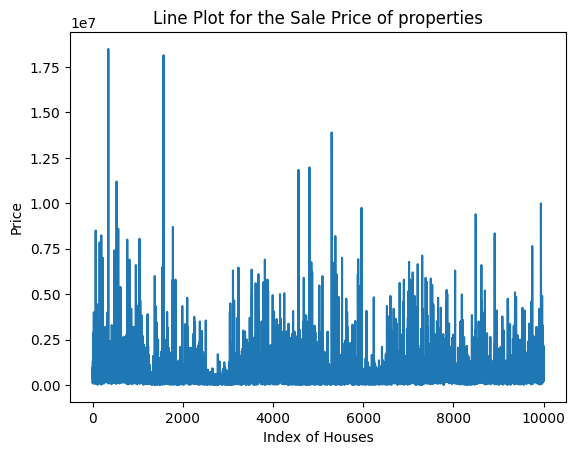

In [ ]:
#show the sale price for properties
plt.figure()
plt.plot(real_estate['Sale Price'])
plt.xlabel("Index of Houses")
plt.ylabel("Price")
plt.title('Line Plot for the Sale Price of properties')

plt.show()

In [ ]:
real_estate['Locality'].unique()

array(['Waterbury', 'Norwalk', 'Bridgeport', 'Greenwich', 'Fairfield',
       'West Hartford', 'Stamford'], dtype=object)

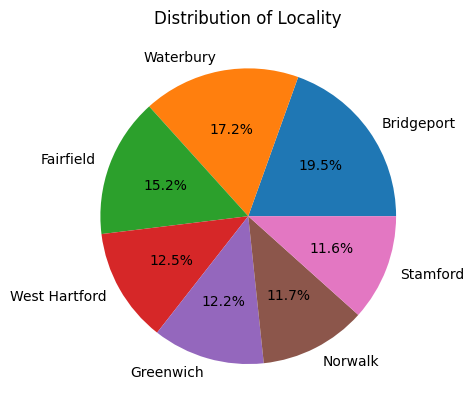

In [ ]:
#show the distribution of Location
plt.pie(real_estate['Locality'].value_counts(),autopct='%1.1f%%',labels=['Bridgeport','Waterbury','Fairfield','West Hartford','Greenwich','Norwalk','Stamford'])
plt.title('Distribution of Locality')
plt.show()

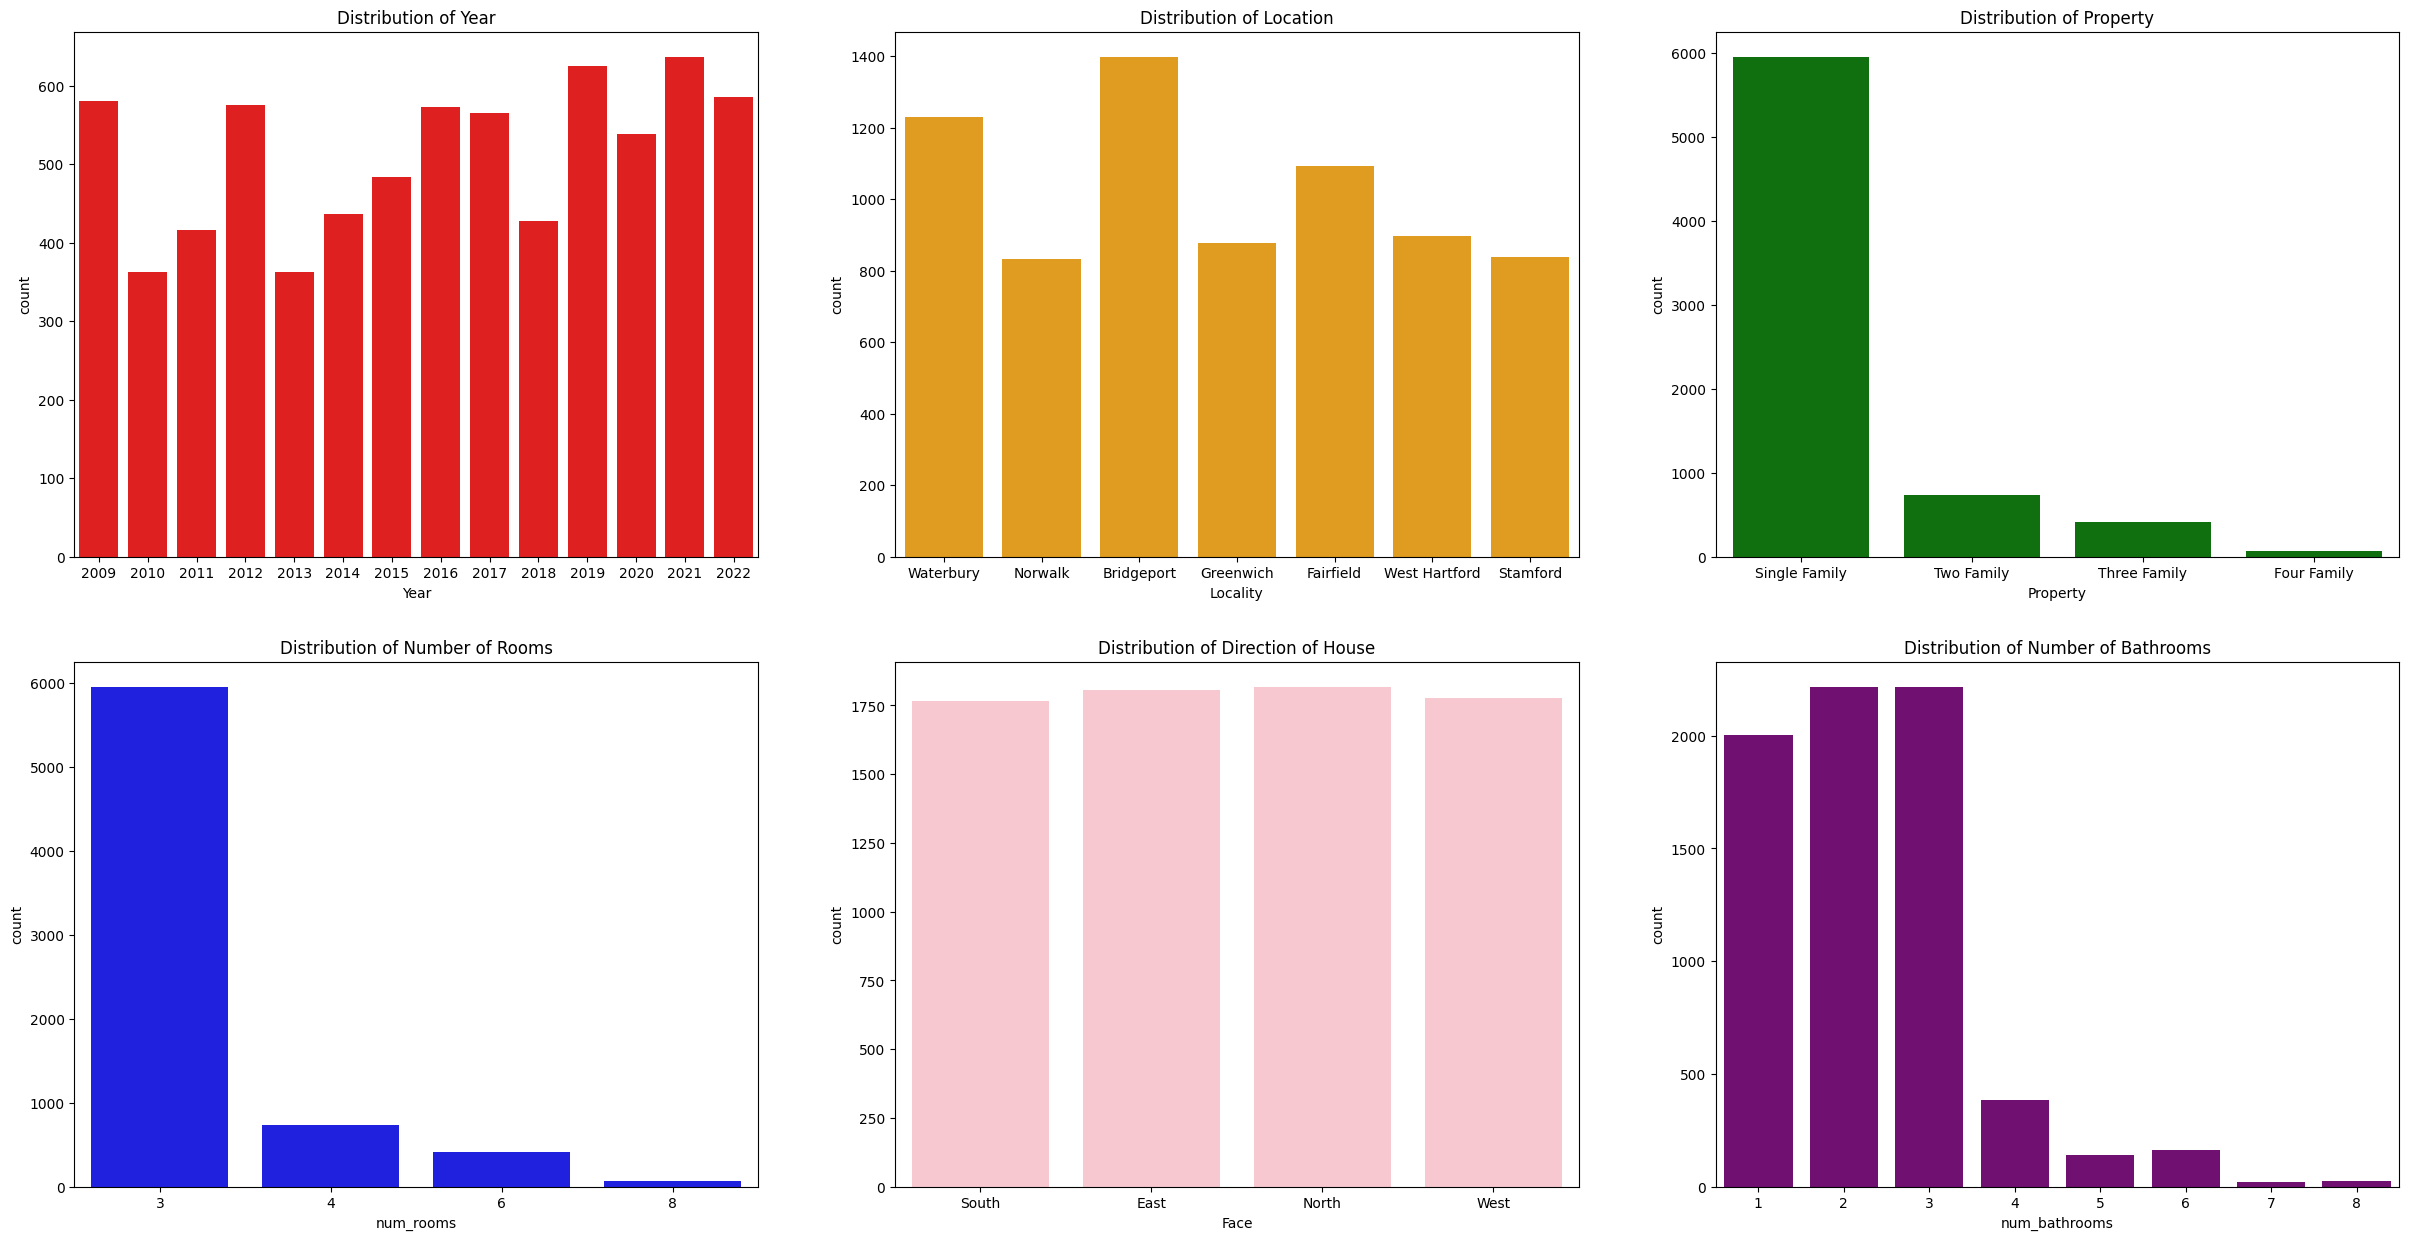

In [ ]:
# Distribution of multiple variables
plt.figure(figsize=(30,15))
plt.subplot(231)
sns.countplot(data=real_estate, x='Year', color='red')
plt.title('Distribution of Year')

plt.subplot(232)
sns.countplot(data=real_estate, x='Locality', color='orange')
plt.title('Distribution of Location')

plt.subplot(233)
sns.countplot(data=real_estate, x='Property', color='green')
plt.title('Distribution of Property')

plt.subplot(234)
sns.countplot(data=real_estate, x='num_rooms', color='blue')
plt.title('Distribution of Number of Rooms')

plt.subplot(235)
sns.countplot(data=real_estate, x='Face', color='pink')
plt.title('Distribution of Direction of House')

plt.subplot(236)
sns.countplot(data=real_estate, x='num_bathrooms', color='purple')
plt.title('Distribution of Number of Bathrooms')

plt.show()

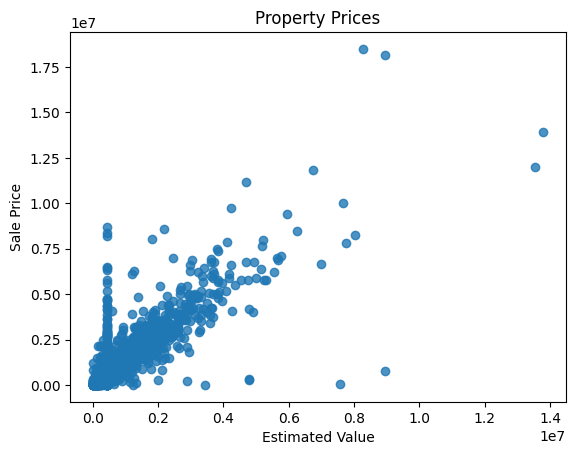

In [ ]:
#show the property prices
plt.scatter(real_estate['Estimated Value'], real_estate['Sale Price'], alpha=0.8)
plt.xlabel('Estimated Value')
plt.ylabel('Sale Price')

plt.title('Property Prices')

plt.show()


In [ ]:
# Estimated values of 0 so drop them.
real_estate['Estimated Value'].sort_values(ascending=True)
real_estate = real_estate.drop(real_estate[real_estate['Estimated Value'] < 3499].index)

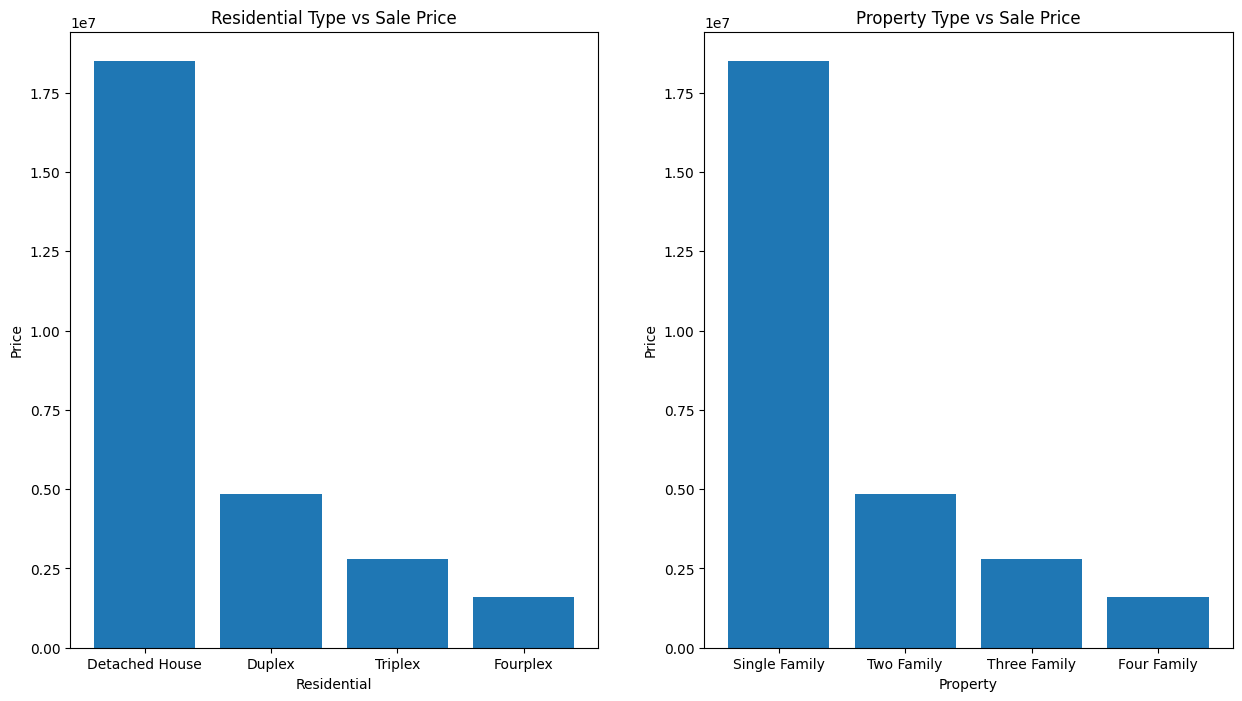

In [ ]:
# show residential and property type vs sale price
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.bar(data=real_estate, x='Residential', height='Sale Price')
plt.xlabel('Residential')
plt.ylabel('Price')
plt.title('Residential Type vs Sale Price')

plt.subplot(122)
plt.bar(data=real_estate, x='Property', height='Sale Price')
plt.xlabel('Property')
plt.ylabel('Price')
plt.title('Property Type vs Sale Price')
plt.show()

#Preprocessing the Data, converting objects to numerical data

In [ ]:
#Convert objects to numerical data
real_estate[real_estate.select_dtypes(include='object').columns] = real_estate.select_dtypes(include='object').apply(lambda x:x.factorize()[0])

In [ ]:
real_estate.head()

,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009,0,1.114400e+05,185000.0,0,0,3,3,996.000000,1.025953,0
2,2009,0,5.054000e+04,105000.0,0,0,3,1,951.000000,1.025953,1
3,2009,1,5.710600e+05,1000000.0,0,0,3,2,1109.799425,1.025953,0
4,2009,2,4.775276e+06,272900.0,0,0,3,1,971.000000,1.025953,1
6,2009,1,4.430183e+05,1340000.0,0,0,3,1,936.000000,1.025953,2


In [ ]:
# Create a copy of the DataFrame to store truncated data
real_estate_truncated = real_estate.copy()

# Loop through each numerical variable
for col in numeric_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = real_estate_truncated[col].quantile(0.25)
    Q3 = real_estate_truncated[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    IQR

    # Identify outliers
    outliers = (real_estate_truncated[col] < (Q1 - 1.5 * IQR)) | (real_estate_truncated[col] > (Q3 + 1.5 * IQR))

    # Remove outliers
    real_estate_truncated = real_estate_truncated[~outliers]

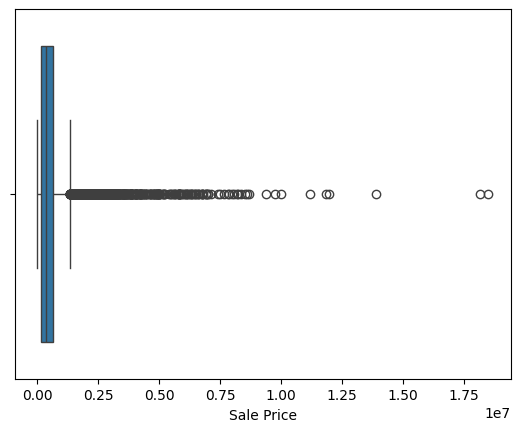

In [ ]:
#before removal of outliers
sns.boxplot(x='Sale Price',data=real_estate)
plt.show()

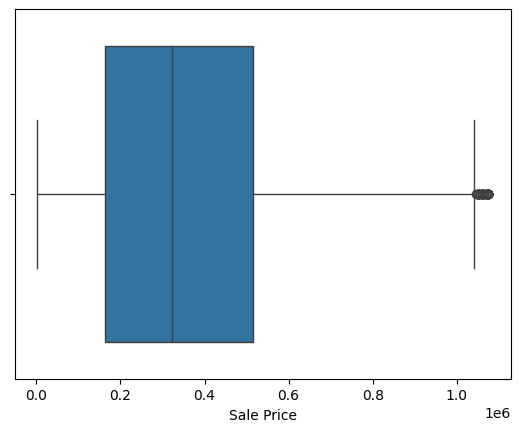

In [ ]:
#outliers removed
sns.boxplot(x='Sale Price',data=real_estate_truncated)
plt.show()

In [ ]:
real_estate_truncated.head()

,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009,0,111440.0,185000.0,0,0,3,3,996.000000,1.025953,0
2,2009,0,50540.0,105000.0,0,0,3,1,951.000000,1.025953,1
3,2009,1,571060.0,1000000.0,0,0,3,2,1109.799425,1.025953,0
10,2009,1,208880.0,370000.0,0,0,3,2,1063.000000,1.025953,0
15,2009,1,186410.0,340000.0,0,0,3,2,933.000000,1.025953,1


##Visualization:##
 Visualize the distribution and the relationship between variables using various data visualization tools using matplotlib and seaborn.

##Some of the same visuals, but with the truncated and converted data

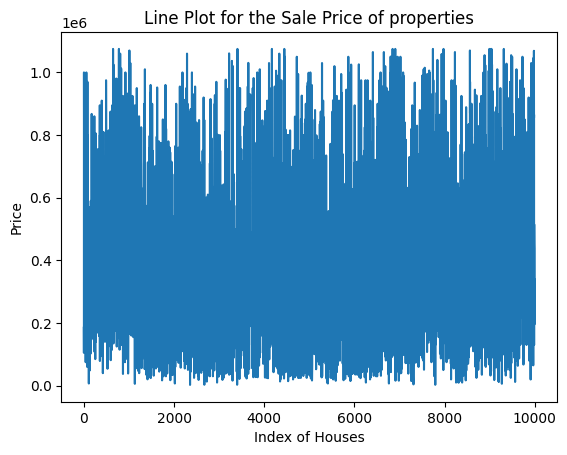

In [ ]:
#show the sale price for properties
plt.figure()
plt.plot(real_estate_truncated['Sale Price'])
plt.xlabel("Index of Houses")
plt.ylabel("Price")
plt.title('Line Plot for the Sale Price of properties')

plt.show()

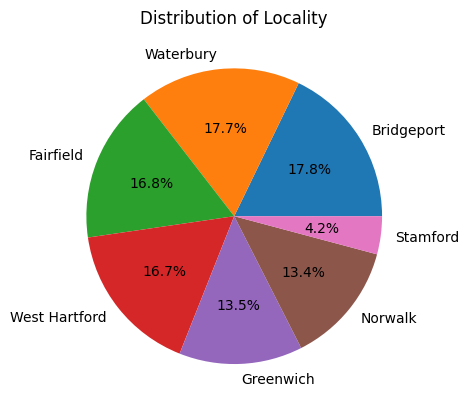

In [ ]:
#show the distribution of Location
plt.pie(real_estate_truncated['Locality'].value_counts(),autopct='%1.1f%%',labels=['Bridgeport','Waterbury','Fairfield','West Hartford','Greenwich','Norwalk','Stamford'])
plt.title('Distribution of Locality')
plt.show()

###Was completed before the preprocessing for better interpretation

#Train/Test split and Normalization/Standardization:
Make X and y data, split into train/test set and then normalize both train and test input features X.

In [ ]:
X=real_estate_truncated.drop(columns=['Sale Price'])
y=real_estate_truncated['Sale Price']

In [ ]:
# Use sklearn function
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Year,Locality,Estimated Value,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
2904,2013,6,382870.0,0,0,3,2,929.000000,1.020333,2
4885,2016,4,391650.0,0,0,3,2,1109.799425,1.348259,0
8787,2021,6,370360.0,0,0,3,2,987.000000,1.023495,1
6061,2017,1,257110.0,0,0,3,1,979.000000,1.388283,2
7210,2019,0,116150.0,0,0,3,1,1109.799425,1.025899,1


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3987, 10)
(997, 10)
(3987,)
(997,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Normalize the training set
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Normalize the testing set using the same scaler
X_test_scaled = scaler.transform(X_test)

#Build a base regression model  and train/test taking all features.
Calculate the performance evaluation metrics: rmse, mape, and R.

In [ ]:
# Import required library/function
from sklearn.linear_model import LinearRegression

In [ ]:
# Create the linear regression model
base_model = LinearRegression(fit_intercept = True)

In [ ]:
base_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predict the selling price of the cars from the Test data
y_pred = base_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Define mean absolute percent error function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mae_base = mean_absolute_error(y_test, y_pred)
mape_base = mean_absolute_percentage_error(y_test, y_pred)
mse_base = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error (RMSE)
rmse_base = np.sqrt(mse_base)
r2_base = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae_base)
print("Mean Absolute Percentage Error:", mape_base)
print("Mean Squared Error:", mse_base)
print("Root Mean Squared Error:",rmse_base)
print("R-squared Score:", r2_base)

Mean Absolute Error: 104679.4606808671
Mean Absolute Percentage Error: 85.58903682957276
Mean Squared Error: 22190759723.53411
Root Mean Squared Error: 148965.63269269228
R-squared Score: 0.634451397585569


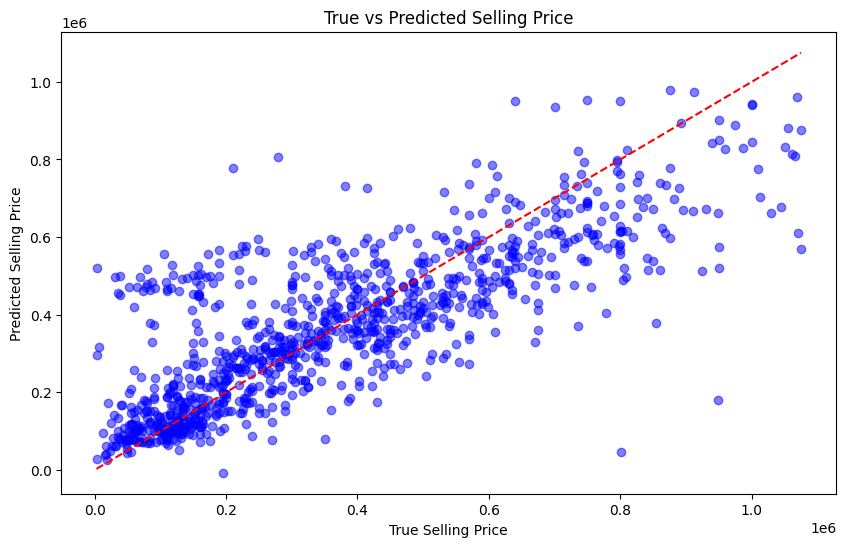

In [ ]:
# Plot scatter plot for true vs. predicted sale price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs Predicted Selling Price')
plt.xlabel('True Selling Price')
plt.ylabel('Predicted Selling Price')

plt.show()

#Select best set of input features:
Utilize feature selection methods to select best set of input features so that test prediction error (rmse and mape) are minimum and R^2 is maximum.

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
K= X.shape[1]

rmse=[]
mape=[]
r2=[]

for i in range(1,K+1):
  # Out of 14 x input features select k
  rfe = RFE(estimator=base_model, n_features_to_select=i)
  # fit the RFE object to the data
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]

  X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected,
                                            y, test_size=0.2, random_state=42)


  # Train a regression model with the selected features
  reg_model_k_best = LinearRegression()
  reg_model_k_best.fit(X_selected_train, y_train)

  y_pred = reg_model_k_best.predict(X_selected_test)

  # Calculate Mean Squared Error
  mse = mean_squared_error(y_test, y_pred)

  rmse.append(np.sqrt(mse))
  r2.append(r2_score(y_test, y_pred))
  mape.append(mean_absolute_percentage_error(y_test, y_pred))

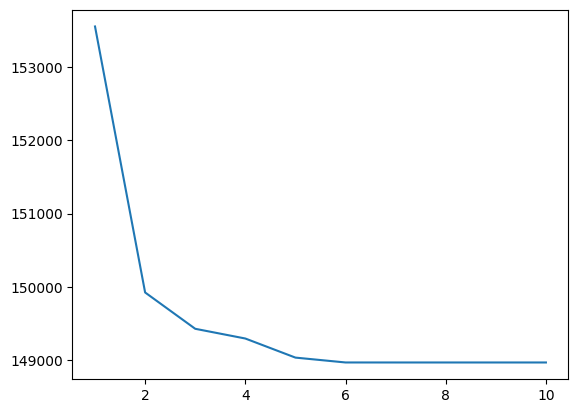

In [ ]:
plt.plot(range(1, K+1), rmse)

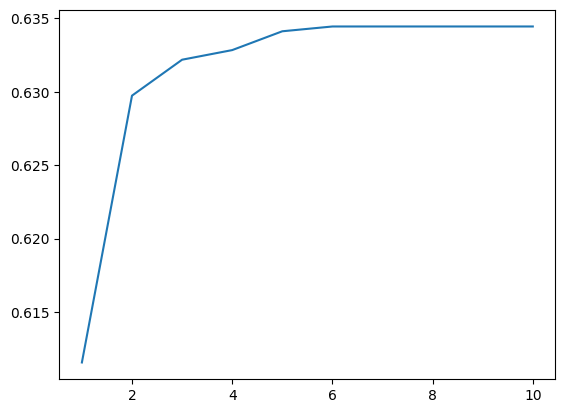

In [ ]:
plt.plot(range(1,K+1),r2)

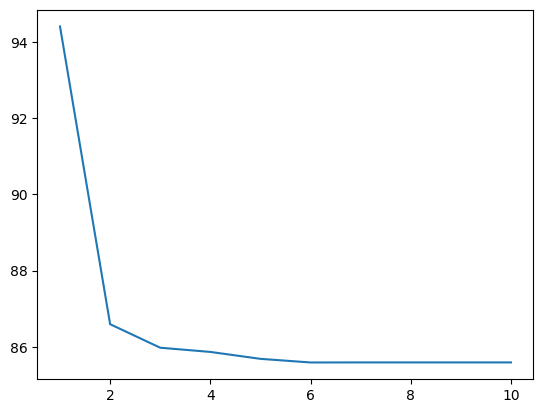

In [ ]:
plt.plot(range(1,K+1), mape)

In [ ]:
metric_dict={'k':range(1,K+1), 'rmse':rmse,'mape':mape, 'r2':r2}

In [ ]:
metric_df=pd.DataFrame(metric_dict)
metric_df

,k,rmse,mape,r2
0,1,153557.694520,94.413144,0.611567
1,2,149922.466630,86.592831,0.629740
2,3,149426.051911,85.974874,0.632188
3,4,149293.061613,85.864608,0.632843
4,5,149032.213606,85.682745,0.634125
5,6,148965.786563,85.587296,0.634451
6,7,148965.632693,85.589037,0.634451
7,8,148965.632693,85.589037,0.634451
8,9,148965.632693,85.589037,0.634451
9,10,148965.632693,85.589037,0.634451


In [ ]:
metric_df[(metric_df['rmse'] == min(metric_df['rmse']))| (metric_df['mape'] == min(metric_df['mape'])) | (metric_df['r2'] == max(metric_df['r2']))]

,k,rmse,mape,r2
5,6,148965.786563,85.587296,0.634451
8,9,148965.632693,85.589037,0.634451


In [ ]:
# the best model so far is with k=6
rfe = RFE(estimator=base_model, n_features_to_select=6)
# fit the RFE object to the data
rfe.fit(X_train_scaled, y_train)

# select only the selected features
X_selected = X[X.columns[rfe.support_]]

# Split into train test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#
base_model.fit(X_selected_train, y_train)

y_pred = base_model.predict(X_selected_test)

In [ ]:
# Fit RFE
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [ ]:
# Print selected features
print("Selected features: ", X.columns[rfe.support_])

Selected features:  Index(['Year', 'Locality', 'num_bathrooms', 'carpet_area', 'property_tax_rate',
       'Face'],
      dtype='object')


#Build the Regression Model from k-best features:
Train the model with selected best set of features on train set. Then evaluate the performance of the model on the test set using rmse, mape, and R^2.

In [ ]:
# Get selected feature indices
selected_indices = rfe.support_

# Extract selected features from the training and testing data
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

# Fit a regression model using the selected features
regressor_selected = LinearRegression()
regressor_selected.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_selected = regressor_selected.predict(X_test_selected)

# Calculate evaluation metrics
mape_selected=mean_absolute_percentage_error(y_test, y_pred)
mse_selected=mean_squared_error(y_test, y_pred)
rmse_selected = np.sqrt(mse_selected)
r2_selected = r2_score(y_test, y_pred)

#Summarize your findings
Compare the model performance between base model and model with k best input features.

In [ ]:
# Evaluation metrics for the base model
print("Base Model Metrics:")
print("Mean Absolute Percentage Error:", mape_base)
print("Root Mean Squared Error:", rmse_base)
print("R-squared Score:", r2_base)

# Evaluation metrics for the model with k-best features
print("\nModel with K-best Features Metrics:")
print("Mean Absolute Percentage Error (Selected Features):", mape_selected)
print("Root Mean Squared Error (Selected Features):", rmse_selected)
print("R-squared Score (Selected Features):", r2_selected)

Base Model Metrics:
Mean Absolute Percentage Error: 85.58903682957276
Root Mean Squared Error: 148965.63269269228
R-squared Score: 0.634451397585569

Model with K-best Features Metrics:
Mean Absolute Percentage Error (Selected Features): 85.587296372547
Root Mean Squared Error (Selected Features): 148965.78656298562
R-squared Score (Selected Features): 0.6344506424167597


These comparisons suggest that the inclusion of the K-best features didn't significantly impact the model's performance.The features that help predict the property prices the most accurately are 'Year', 'Locality', 'num_bathrooms', 'carpet_area', 'property_tax_rate', 'Face'. However, since the metric differences in the models are very minor, you could also use either model.